In [1]:
import json
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [32]:
split = 2

In [33]:
eval_file = f"facebase/results/Adience_256x256_resnet50_imagenet_noisy_dldl_v2_3/split{split}/evaluation.pt"
clean_data_file = f"facebase/data/Adience_256x256_resnet50_imagenet_dldl_v2_clean/data_split{split}.csv"
noisy_data_file = f"facebase/data/Adience_256x256_resnet50_imagenet_noisy_dldl_v2/data_split{split}.csv"

In [34]:
means_file = f"facebase/results/Adience_256x256_resnet50_imagenet_noisy_dldl_v2_3/split{split}/mean_history.json"
sigmas_file = f"facebase/results/Adience_256x256_resnet50_imagenet_noisy_dldl_v2_3/split{split}/sigma_history.json"

In [35]:
noisy_df = pd.read_csv(noisy_data_file, header=None)
clean_df = pd.read_csv(clean_data_file, header=None)
eval = torch.load(eval_file)

In [36]:
with open(means_file, 'r') as file:
    last_means = json.load(file)

with open(sigmas_file, 'r') as file:
    last_sigmas = json.load(file)

means = {int(key): value[-1] for key, value in last_means.items()}
sigmas = {int(key): value[-1] for key, value in last_sigmas.items()}

In [37]:
eval.keys()

dict_keys(['config', 'split', 'error', 'log_history', 'posterior', 'true_label', 'predicted_label', 'id', 'folder'])

In [38]:
df = noisy_df.copy()
df['clean_label'] = clean_df[3]
df['predicted_label'] = eval['predicted_label']['age']
df['preds'] = list(np.array(F.softmax(torch.tensor(eval['posterior']['age']), dim=1)))
df.rename(columns={0: 'id', 1:'img_path', 2: 'folder', 3: 'noisy_label'}, inplace=True)

# df['max_prob'] = df['preds'].apply(np.max)  # Calculate mean
# df['variance'] = df['preds'].apply(np.var)  # Calculate variance
df['mean'] = df['id'].map(means)
df['sigma'] = df['id'].map(sigmas)

pd.set_option('display.max_colwidth', None) # Show full content of each cell

# df.to_csv("yoyo.csv")
df

,id,img_path,folder,noisy_label,clean_label,predicted_label,preds,mean,sigma
0,0,facebase/data/Adience_256x256_resnet50_imagenet_mean_variance/images/img0000000.png,0,4,4,4,"[0.10942099, 0.11052055, 0.11488552, 0.13503814, 0.17755207, 0.13002563, 0.11259325, 0.109963864]",4.026844,0.093248
1,1,facebase/data/Adience_256x256_resnet50_imagenet_mean_variance/images/img0000001.png,0,4,4,4,"[0.10893417, 0.10969153, 0.11221806, 0.12879798, 0.18779565, 0.13081272, 0.11242382, 0.109326035]",4.000000,0.003865
2,2,facebase/data/Adience_256x256_resnet50_imagenet_mean_variance/images/img0000002.png,0,4,4,4,"[0.109224245, 0.10971206, 0.11223028, 0.12623699, 0.178257, 0.13861291, 0.11530737, 0.110419065]",4.000000,0.003865
3,3,facebase/data/Adience_256x256_resnet50_imagenet_mean_variance/images/img0000003.png,0,1,4,4,"[0.109637916, 0.11108553, 0.11664756, 0.13603242, 0.1829874, 0.12120241, 0.11223702, 0.11016978]",3.999961,0.018715
4,4,facebase/data/Adience_256x256_resnet50_imagenet_mean_variance/images/img0000004.png,0,0,4,4,"[0.10957818, 0.11095638, 0.114632726, 0.13605182, 0.17790456, 0.12880903, 0.1120712, 0.109996125]",3.999943,0.024423
...,...,...,...,...,...,...,...,...,...
17697,17697,facebase/data/Adience_256x256_resnet50_imagenet_mean_variance/images/img0017697.png,0,6,4,4,"[0.10982765, 0.11213465, 0.119018964, 0.14697035, 0.15831307, 0.12775694, 0.11510449, 0.110873915]",4.000017,0.012665
17698,17698,facebase/data/Adience_256x256_resnet50_imagenet_mean_variance/images/img0017698.png,0,4,4,4,"[0.108422846, 0.108814396, 0.11066599, 0.12269949, 0.19093665, 0.13738112, 0.112216204, 0.10886321]",3.999993,0.006215
17699,17699,facebase/data/Adience_256x256_resnet50_imagenet_mean_variance/images/img0017699.png,0,4,4,3,"[0.109404005, 0.114181735, 0.14076488, 0.17721084, 0.12757263, 0.112146854, 0.10969715, 0.109021954]",3.693902,0.528219
17700,17700,facebase/data/Adience_256x256_resnet50_imagenet_mean_variance/images/img0017700.png,0,3,4,3,"[0.11094396, 0.114652194, 0.12642378, 0.15167406, 0.15334591, 0.120164804, 0.11232965, 0.11046564]",3.999986,0.009005


In [39]:
df['clean_label'].value_counts().sort_index()

clean_label
0    2491
1    2140
2    2292
3    1642
4    5095
5    2340
6     830
7     872
Name: count, dtype: int64

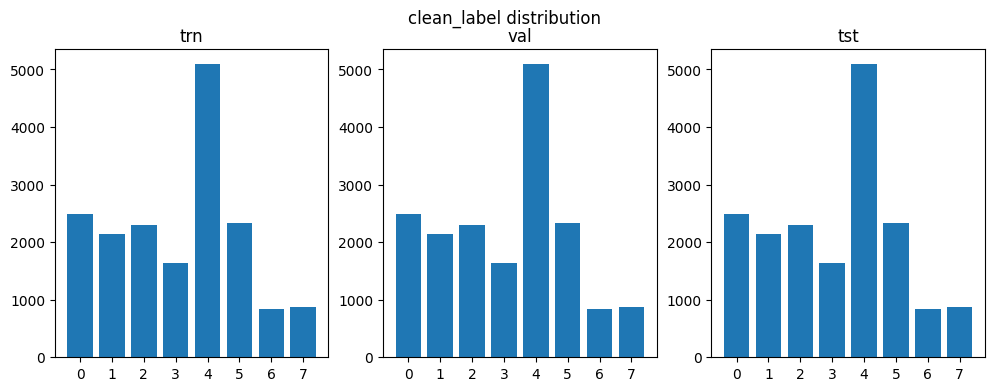

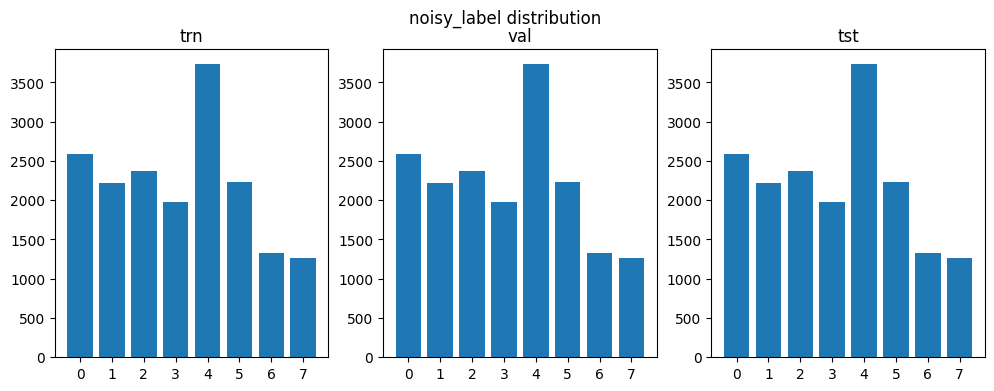

In [40]:
for label_type in ['clean_label', 'noisy_label']:
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    for idx, split in enumerate(['trn', 'val', 'tst']):
        temp_df = df[df['folder'] == idx]

        axs[idx].bar(df[label_type].value_counts().sort_index().index,
                     df[label_type].value_counts().sort_index().values)
        axs[idx].set_title(split)
        axs[idx].set_xticks(df[label_type].value_counts().sort_index().index)

    plt.suptitle(f'{label_type} distribution')
    plt.show()

In [11]:
trn_df = df[df['folder'] == 0]
clean_df = trn_df[trn_df['noisy_label'] == trn_df['clean_label']]
corrupted_df = clean_df[clean_df['mean'].round().astype(int) != clean_df['noisy_label']]

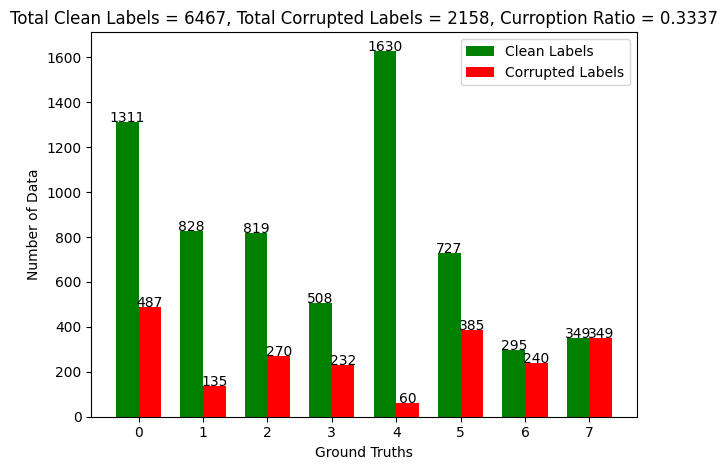

In [12]:
# Data for the plot
categories = clean_df["clean_label"].unique()  # X-axis labels
values1 =  [len(clean_df[clean_df["clean_label"] == label]) for label in range(len(categories))] # First set of values
values2 = [len(corrupted_df[corrupted_df["clean_label"] == label]) for label in range(len(categories))]  # Second set of values

# Define the width of each bar
bar_width = 0.35

# Generate positions for the bars
x = np.arange(len(categories))

# Create the bar plot
plt.bar(x - bar_width / 2, values1, width=bar_width, color='green', label='Clean Labels')
plt.bar(x + bar_width / 2, values2, width=bar_width, color='red', label='Corrupted Labels')

# Add labels, title, and legend
plt.xlabel('Ground Truths')
plt.ylabel('Number of Data')
plt.title(f'Total Clean Labels = {len(clean_df)}, Total Corrupted Labels = {len(corrupted_df)}, Curroption Ratio = {round(len(corrupted_df)/len(clean_df), 4)}')
plt.xticks(ticks=x, labels=x)
plt.legend()

# Display the values on top of the bars
for i, (v1, v2) in enumerate(zip(values1, values2)):
    plt.text(x[i] - bar_width / 2, v1 + 0.2, str(v1), ha='center')
    plt.text(x[i] + bar_width / 2, v2 + 0.2, str(v2), ha='center')

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
noisy_df = trn_df[trn_df['noisy_label'] != trn_df['clean_label']]
corrected_df = noisy_df[noisy_df['mean'].round().astype(int) == noisy_df['clean_label']]

len(noisy_df), len(corrected_df)

(4487, 2312)

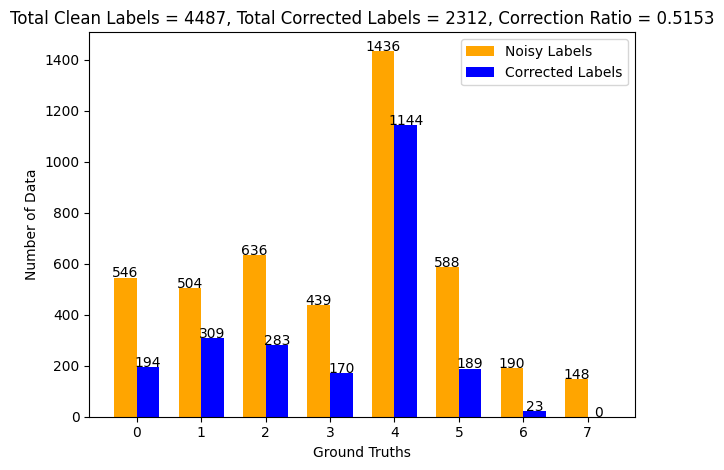

In [14]:
# Data for the plot
categories = noisy_df["clean_label"].unique()  # X-axis labels
values1 =  [len(noisy_df[noisy_df["clean_label"] == label]) for label in range(len(categories))] # First set of values
values2 = [len(corrected_df[corrected_df["clean_label"] == label]) for label in range(len(categories))]  # Second set of values

# Define the width of each bar
bar_width = 0.35

# Generate positions for the bars
x = np.arange(len(categories))

# Create the bar plot
plt.bar(x - bar_width / 2, values1, width=bar_width, color='orange', label='Noisy Labels')
plt.bar(x + bar_width / 2, values2, width=bar_width, color='blue', label='Corrected Labels')

# Add labels, title, and legend
plt.xlabel('Ground Truths')
plt.ylabel('Number of Data')
plt.title(f'Total Clean Labels = {len(noisy_df)}, Total Corrected Labels = {len(corrected_df)}, Correction Ratio = {round(len(corrected_df)/len(noisy_df), 4)}')
plt.xticks(ticks=x, labels=x)
plt.legend()

# Display the values on top of the bars
for i, (v1, v2) in enumerate(zip(values1, values2)):
    plt.text(x[i] - bar_width / 2, v1 + 0.2, str(v1), ha='center')
    plt.text(x[i] + bar_width / 2, v2 + 0.2, str(v2), ha='center')

# Show the plot
plt.tight_layout()
plt.show()

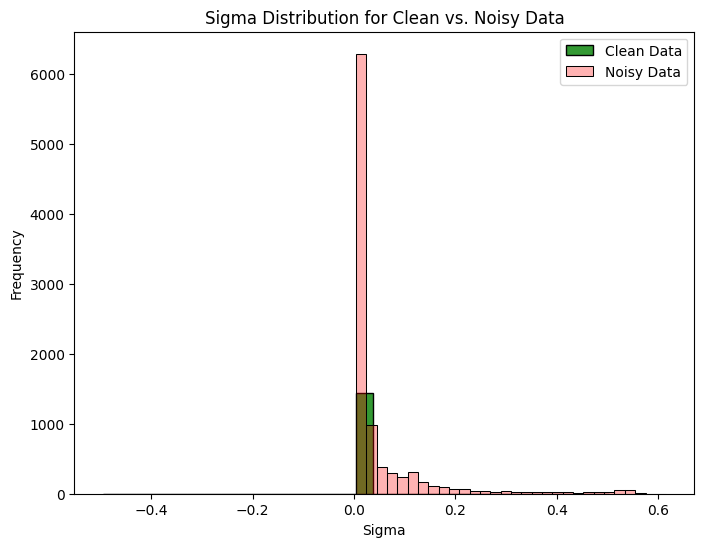

In [25]:
# 2. Sigma Analysis
sigma_clean = trn_df[(trn_df['folder'] != 2) & (trn_df['mean'] == trn_df['clean_label'])]['sigma']
sigma_noisy = trn_df[(trn_df['folder'] != 2) & (trn_df['mean'] != trn_df['clean_label'])]['sigma']

# Plot sigma histograms
plt.figure(figsize=(8, 6))
sns.histplot(sigma_clean, color='green', label='Clean Data', bins=30, alpha=0.8)
sns.histplot(sigma_noisy, color='red', label='Noisy Data', bins=30, alpha=0.3)

plt.title('Sigma Distribution for Clean vs. Noisy Data')
plt.xlabel('Sigma')
plt.ylabel('Frequency')
plt.legend()
plt.show()

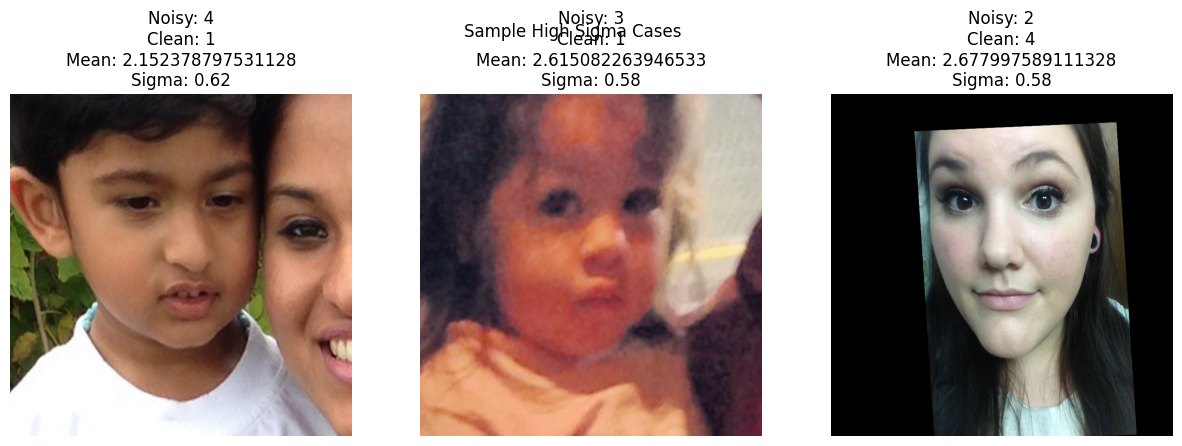

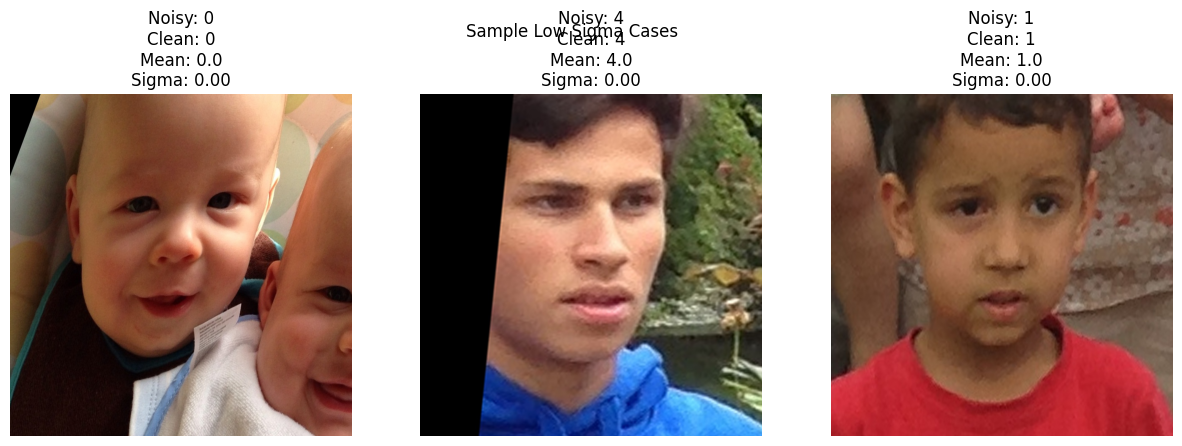

In [15]:
def display_sample_cases(df, n=3, high_sigma=True):
    sample = df.sort_values('sigma', ascending=not high_sigma).head(n)
    fig, axs = plt.subplots(1, n, figsize=(15, 5))
    for i, (idx, row) in enumerate(sample.iterrows()):
        img = plt.imread(row['img_path'])
        axs[i].imshow(img)
        axs[i].set_title(f"Noisy: {row['noisy_label']}\nClean: {row['clean_label']}\nMean: {row['mean']}\nSigma: {row['sigma']:.2f}")
        axs[i].axis('off')
    plt.suptitle(f"Sample {'High' if high_sigma else 'Low'} Sigma Cases")
    plt.show()

# Display high sigma cases
display_sample_cases(trn_df, high_sigma=True)

# Display low sigma cases
display_sample_cases(trn_df, high_sigma=False)

/tmp/ipykernel_1359231/1861020338.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trn_df['preds'] = trn_df['preds'].apply(eval) if isinstance(trn_df['preds'][0], str) else trn_df['preds']
/tmp/ipykernel_1359231/1861020338.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trn_df['mean_discretized'] = trn_df['mean'].round().astype(int)


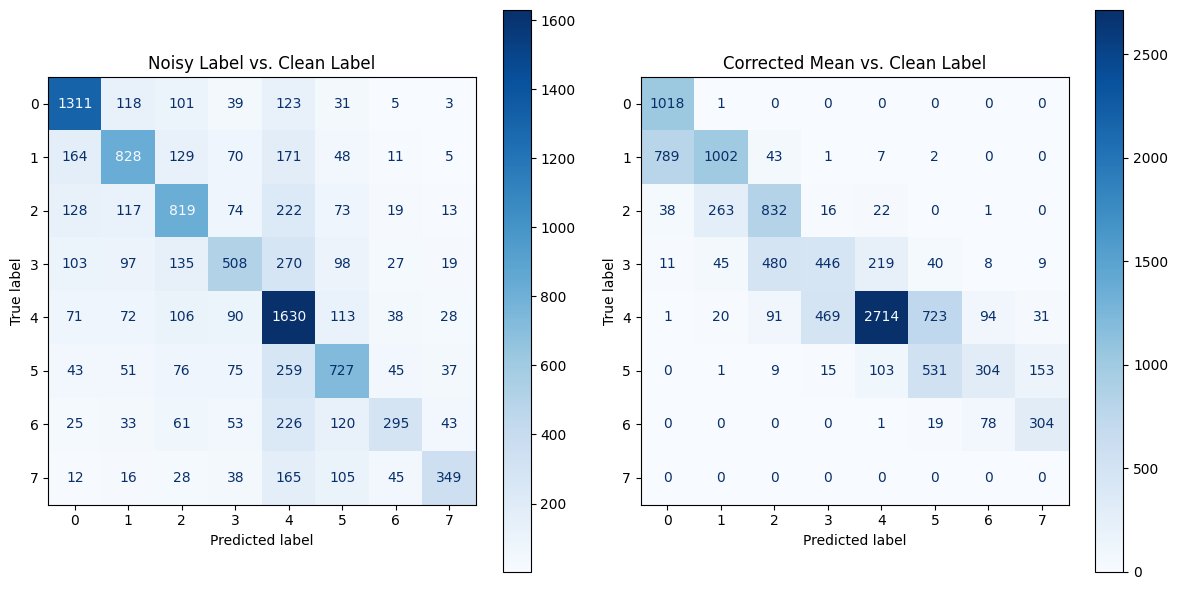

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (assuming it is loaded as `df`)
# df = pd.read_csv('data.csv')  # Replace with your actual file if not a placeholder

# Ensure that preds is converted to a list if stored as a string
trn_df['preds'] = trn_df['preds'].apply(eval) if isinstance(trn_df['preds'][0], str) else trn_df['preds']

# 1. Confusion Matrix: Noisy vs. Corrected vs. Clean
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Discretize the `mean` column to match `clean_label`
trn_df['mean_discretized'] = trn_df['mean'].round().astype(int)

# Confusion matrices
confusion_noisy_clean = confusion_matrix(trn_df[trn_df['folder'] != 2]['noisy_label'],
                                         trn_df[trn_df['folder'] != 2]['clean_label'])
# Compute confusion matrix for corrected means vs. clean labels
confusion_corrected_clean = confusion_matrix(
    trn_df[trn_df['folder'] != 2]['mean_discretized'], 
    trn_df[trn_df['folder'] != 2]['clean_label']
)

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ConfusionMatrixDisplay(confusion_noisy_clean).plot(ax=ax[0], cmap='Blues')
ax[0].set_title('Noisy Label vs. Clean Label')
ConfusionMatrixDisplay(confusion_corrected_clean).plot(ax=ax[1], cmap='Blues')
ax[1].set_title('Corrected Mean vs. Clean Label')
plt.tight_layout()
plt.show()